In [77]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from functools import *
from collections import Counter

In [37]:
i=Image.open('images/numbers/0.1.png')
iar=np.asarray(i)


In [59]:

def threshold(imgArr):
    balanceArr=[]
    newArr=imgArr
    for eachrow in imgArr:
        for eachpix in eachrow:
            avgnum=reduce(lambda x,y:x+y,eachpix[:3])/len(eachpix[:3])
            balanceArr.append(avgnum)
    balance=reduce(lambda x,y:x+y,balanceArr)/len(balanceArr)
    for eachrow in newArr:
        for eachpix in eachrow:
            if reduce(lambda x,y:x+y,eachpix[:3])/len(eachpix[:3])> balance:
                eachpix[0]=255
                eachpix[1]=255
                eachpix[2]=255
                eachpix[3]=255
            else:
                eachpix[0]=0
                eachpix[1]=0
                eachpix[2]=0
                eachpix[3]=255
    return newArr
            


C:\Users\USER\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: overflow encountered in ubyte_scalars
  import sys
C:\Users\USER\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: RuntimeWarning: overflow encountered in ubyte_scalars
  if sys.path[0] == '':


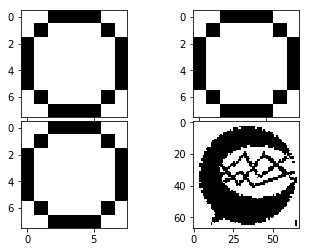

In [60]:
i1=Image.open('images/numbers/0.1.png')
iar1=np.array(i1)
i2=Image.open('images/numbers/y0.4.png')
iar2=np.array(i2)
i3=Image.open('images/numbers/y0.5.png')
iar3=np.array(i3)
i4=Image.open('images/sentdex.png')
iar4=np.array(i4)
threshold(iar1)
threshold(iar2)
threshold(iar3)
threshold(iar4)

fig=plt.figure()
ax1=plt.subplot2grid((8,6),(0,0),rowspan=4,colspan=3)
ax2=plt.subplot2grid((8,6),(0,3),rowspan=4,colspan=3)
ax3=plt.subplot2grid((8,6),(4,0),rowspan=4,colspan=3)
ax4=plt.subplot2grid((8,6),(4,3),rowspan=4,colspan=3)

ax1.imshow(iar1)
ax2.imshow(iar2)
ax3.imshow(iar3)
ax4.imshow(iar4)
plt.show()

In [66]:
def createExample():
    numberArrayExamples=open('numArEx.txt','a')
    numberWeHave=range(0,10)
    versionsWeHave=range(1,10)
    for eachNum in numberWeHave:
        for eachVer in versionsWeHave:
            imgFilePath='images/numbers/'+str(eachNum)+'.'+str(eachVer)+'.png'
            ei=Image.open(imgFilePath)
            eiar=np.array(ei)
            eiar1=str(eiar.tolist())
            
            lineToWrite=str(eachNum)+'::'+eiar1+'\n'

createExample() 

Counter({8: 918, 9: 872, 3: 870, 6: 868, 5: 846, 2: 798, 0: 778, 7: 712, 4: 690, 1: 578})


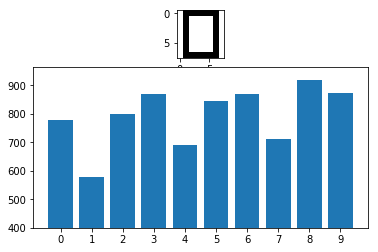

In [96]:
def whatNumIsThis(filepath):
    matchesAr=[]
    loadExamp=open('numArEx.txt','r').read()
    loadExamp=loadExamp.split('\n')
    
    i=Image.open(filepath)
    iar=np.array(i)
    iar1=iar.tolist()
    
    inQuestion=str(iar1)
    
    for eachExample in loadExamp:
        if len(eachExample)>3:
            splitEx=eachExample.split('::')
            currentNum=splitEx[0]
            currentAr=splitEx[1]
            eachPixEx=currentAr.split('],')
            eachPixInq=inQuestion.split('],')
            
            x=0
            while x<len(eachPixEx):
                if eachPixEx[x]== eachPixInq[x]:
                    matchesAr.append(int(currentNum))
                x+=1
    x=Counter(matchesAr)
    print(x)
    graphX=[]
    graphY=[]
    ylimi = 0
    for eachThing in x:
        graphX.append(eachThing)
        graphY.append(x[eachThing])

    fig=plt.figure()
    ax1 = plt.subplot2grid((4,4),(0,0), rowspan=1, colspan=4)
    ax2 = plt.subplot2grid((4,4),(1,0), rowspan=3,colspan=4)
    ax1.imshow(iar)
    ax2.bar(graphX,graphY,align='center')
    plt.ylim(400)
    xloc = plt.MaxNLocator(12)
    ax2.xaxis.set_major_locator(xloc)
    plt.show()
    
whatNumIsThis('images/test.png')

In [75]:
def whatNumIsThis(filePath):

    matchedAr = []
    loadExamps = open('numArEx.txt','r').read()
    loadExamps = loadExamps.split('\n')
    i = Image.open(filePath)
    iar = np.array(i)
    iarl = iar.tolist()
    inQuestion = str(iarl)
    for eachExample in loadExamps:
        try:
            splitEx = eachExample.split('::')
            currentNum = splitEx[0]
            currentAr = splitEx[1]
            eachPixEx = currentAr.split('],')
            eachPixInQ = inQuestion.split('],')
            x = 0
            while x < len(eachPixEx):
                if eachPixEx[x] == eachPixInQ[x]:
                    matchedAr.append(int(currentNum))

                x+=1
        except Exception as e:
            print(str(e))
                
    x = Counter(matchedAr)
    print(x)
whatNumIsThis('images/test.png')

list index out of range
Counter({2: 922, 3: 778, 6: 748, 9: 732, 5: 730, 7: 728, 8: 722, 0: 702, 1: 650, 4: 642})
